In [1]:
import torch
import fastai 
from fastai.vision.all import * 
from ipywidgets import widgets

In [2]:
path=Path("train")

In [3]:
kasallik=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

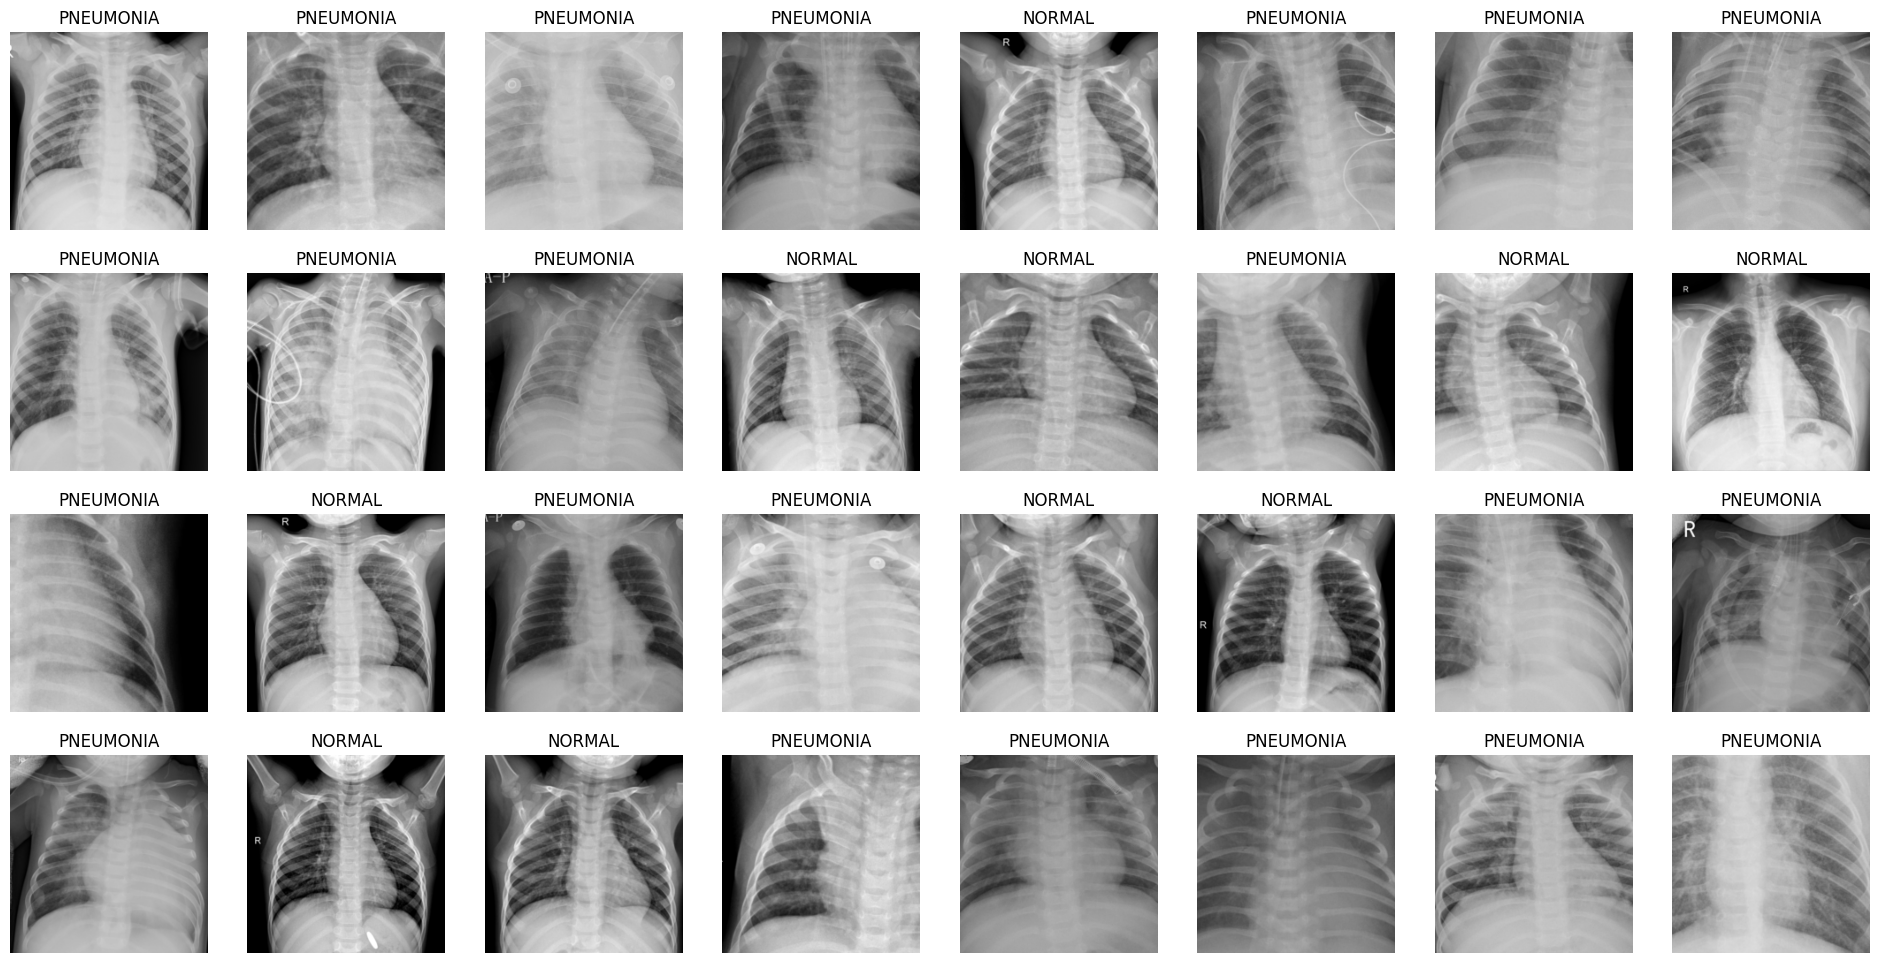

In [4]:
dls=kasallik.dataloaders(path)
dls.train.show_batch(max_n=32, nrows=4)

In [7]:
learn=cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\USER/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:20<00:00, 4.17MB/s]


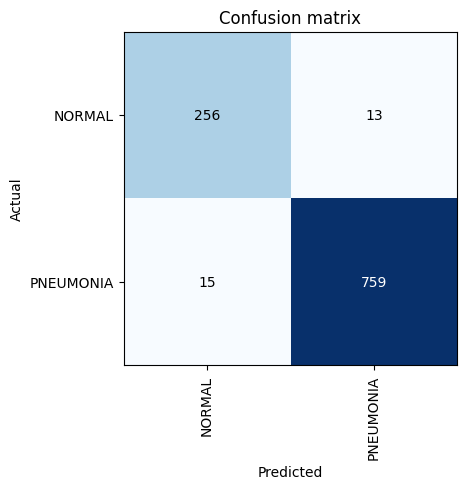

In [8]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

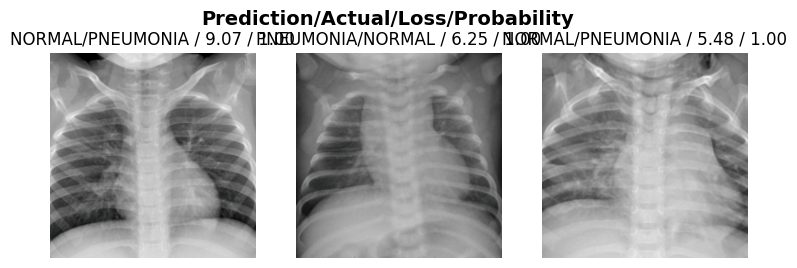

In [11]:
interp.plot_top_losses(3)

In [26]:
upload=widgets.FileUpload()
upload

FileUpload(value=(), description='Upload')

Bashorat: PNEUMONIA
Ehtimollik: 100.0%


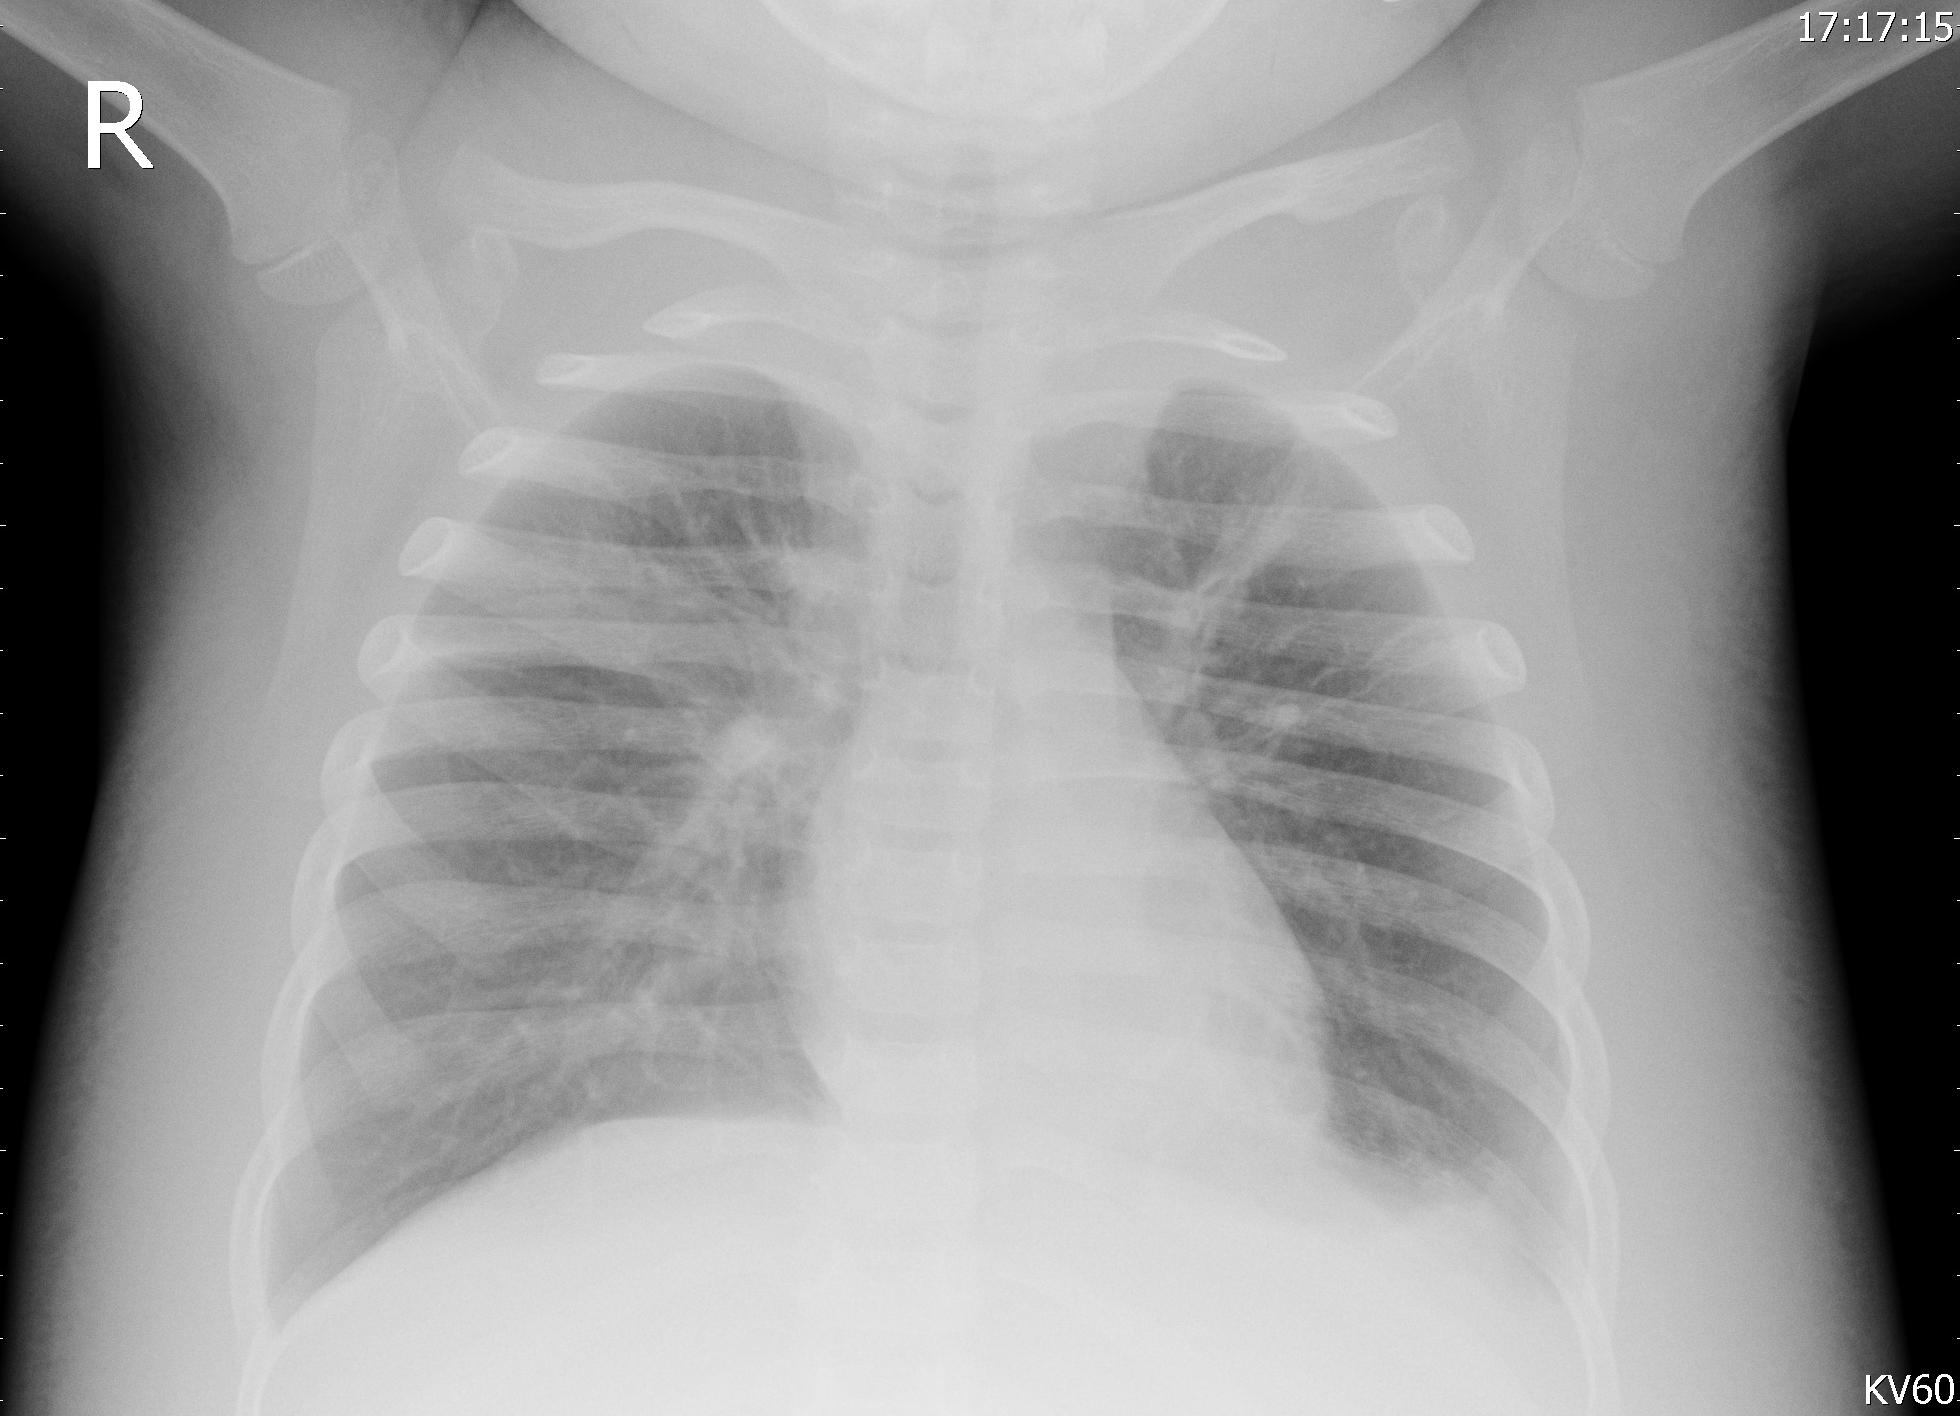

In [31]:
img = PILImage.create(upload.value[0].content.tobytes())
pred, perd_id, probs =learn.predict(img)
print(f"Bashorat: {pred}")
print(f"Ehtimollik: {probs[perd_id]*100:.1f}%")
img

In [33]:
upload1=widgets.FileUpload()
upload1

FileUpload(value=(), description='Upload')

Bashorat: PNEUMONIA
Ehtimollik: 98.5%


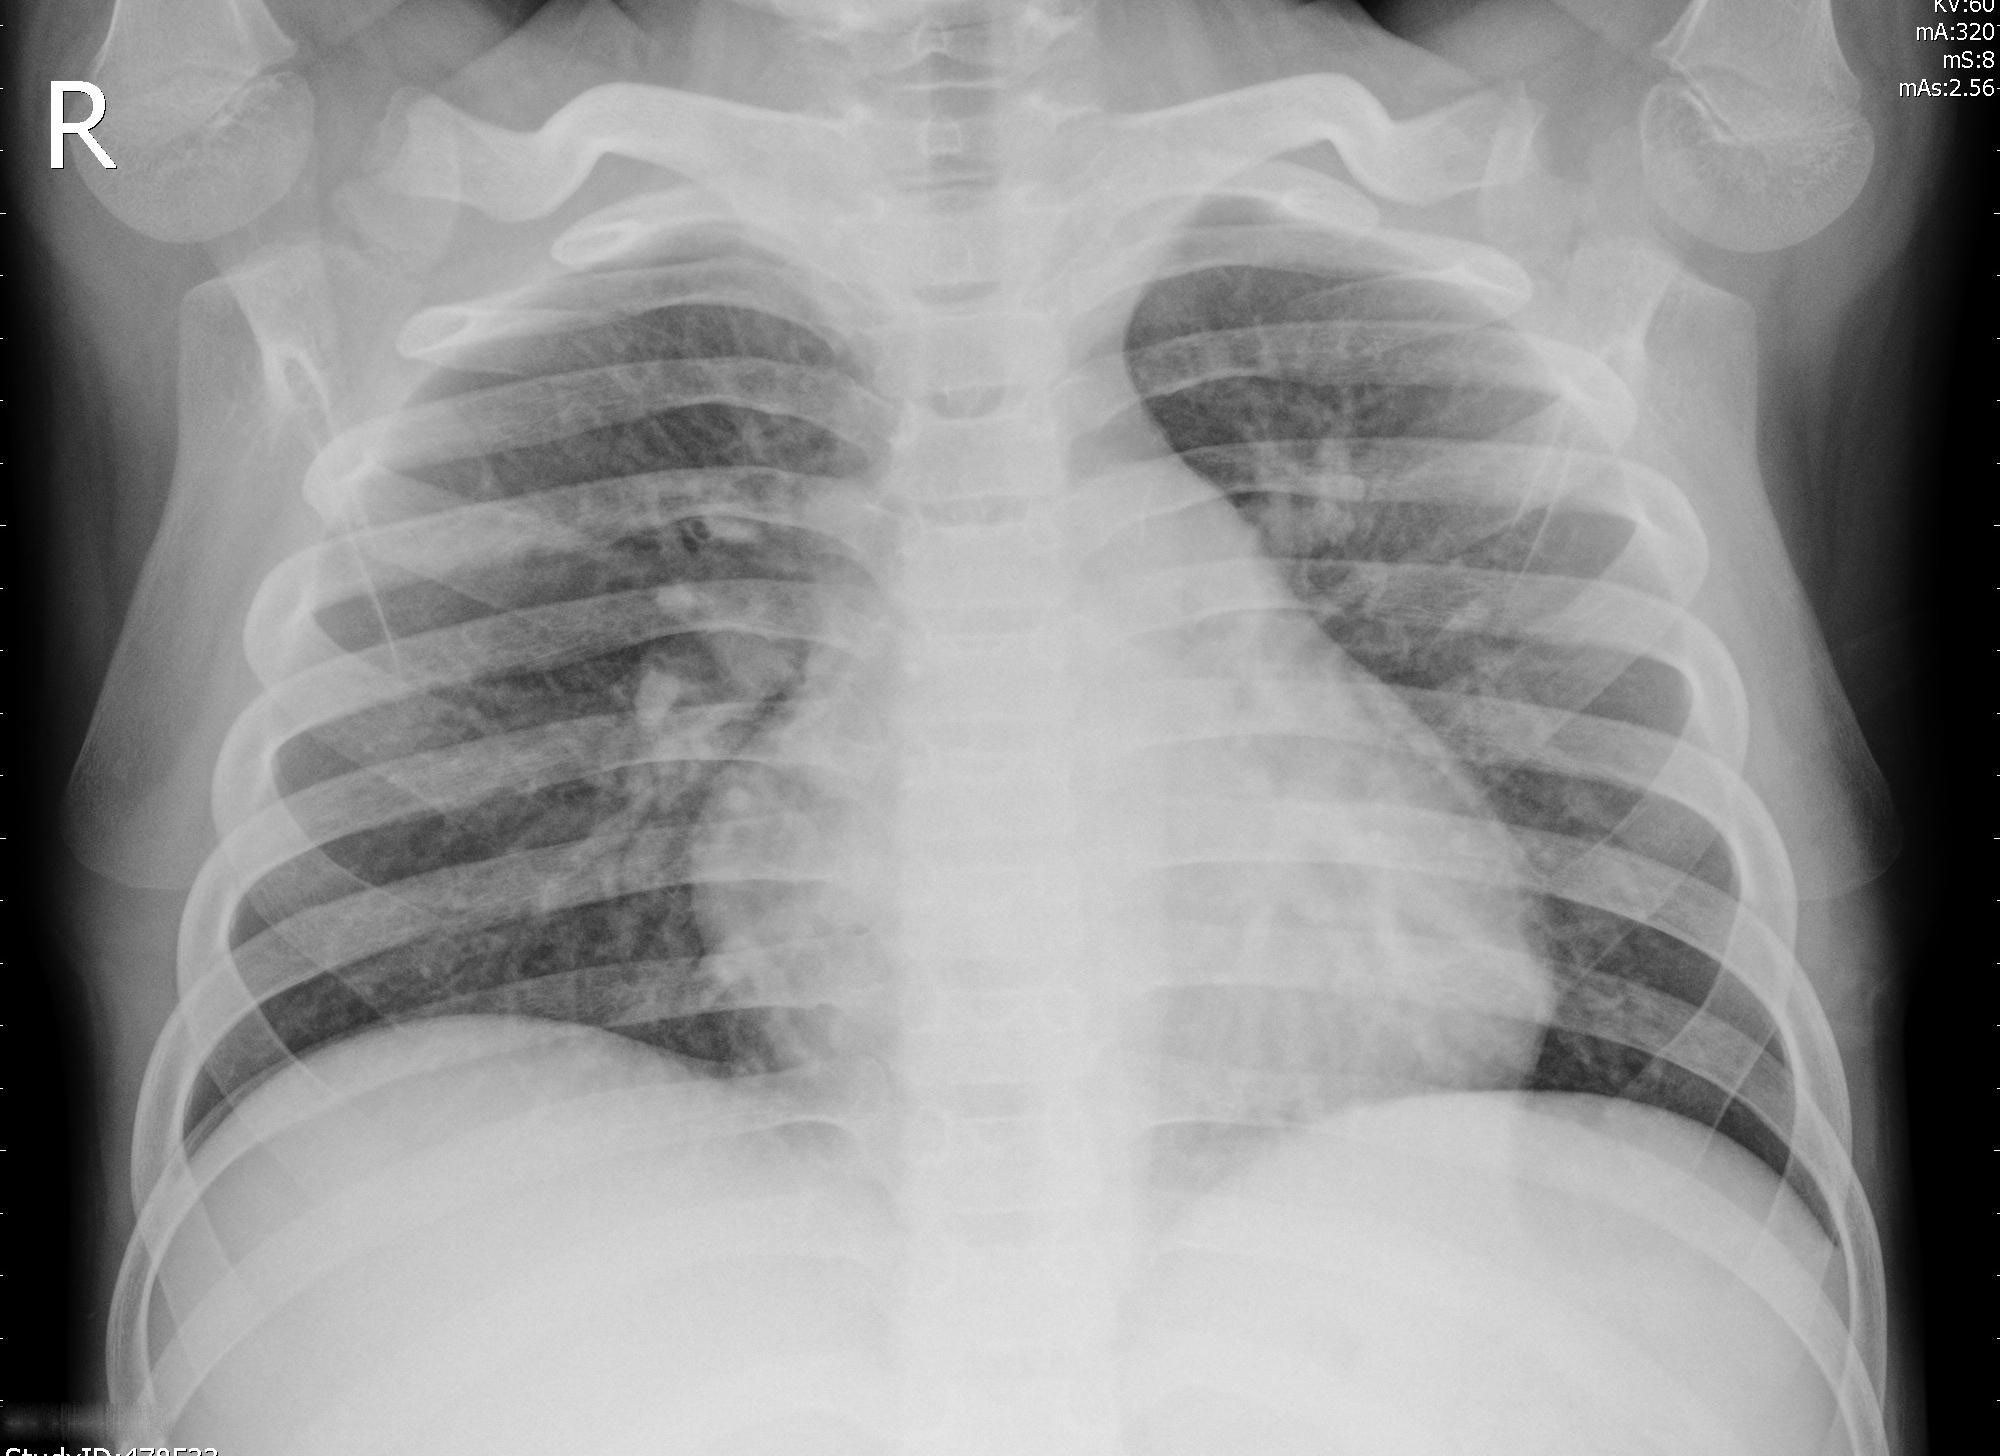

In [36]:
img = PILImage.create(upload.value[0].content.tobytes())
pred, perd_id, probs =learn.predict(img)
print(f"Bashorat: {pred}")
print(f"Ehtimollik: {probs[perd_id]*100:.1f}%")
img